### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [15]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

**Respuesta**
Los datos que observamos son la información estadistica inicial de cualquier análisis, mínima, media, etc. para cada atributo de la leche, con estos podemos observar cual es el comportamiento general de todos los datos observados.

El análisis de agrupamiento sería necesario para encontrar similitudes entre datos, en este caso estamos hablando de leches, entonces podremos encontrar las leches similares, y las que difieren, además de ver en que caracteristica destaca cada una.

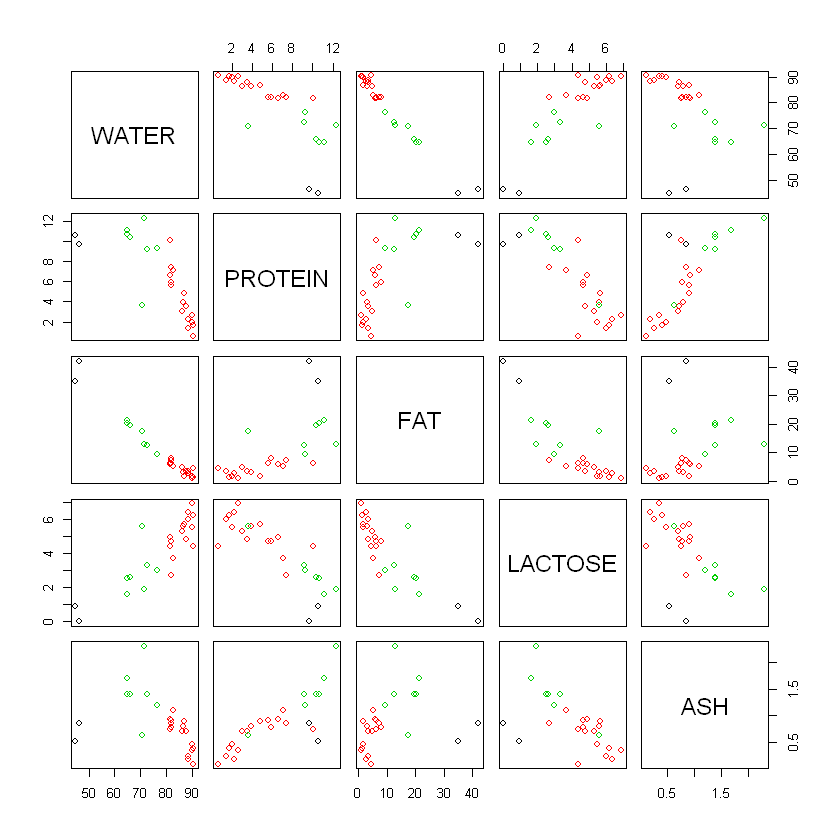

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. 

**Respuesta**
De los gráficos obtenido podemos inferir distinta información, ya que se hace un cruce de datos dependiendo del elemento, agua/lactosa, proteina/grasa, etc, de lo cual podemos observar si existe alguna relación entre estos componentes, por ejemplo, las leches que tienen mucha agua, tieden a tener menor grasa, pero hay 2 excepciones.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
2,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
3,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362


K-means clustering with 3 clusters of sizes 2, 16, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 69.47143  9.514286 16.28571 2.928571 1.432857

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          3          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 377.2215 299.9911
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

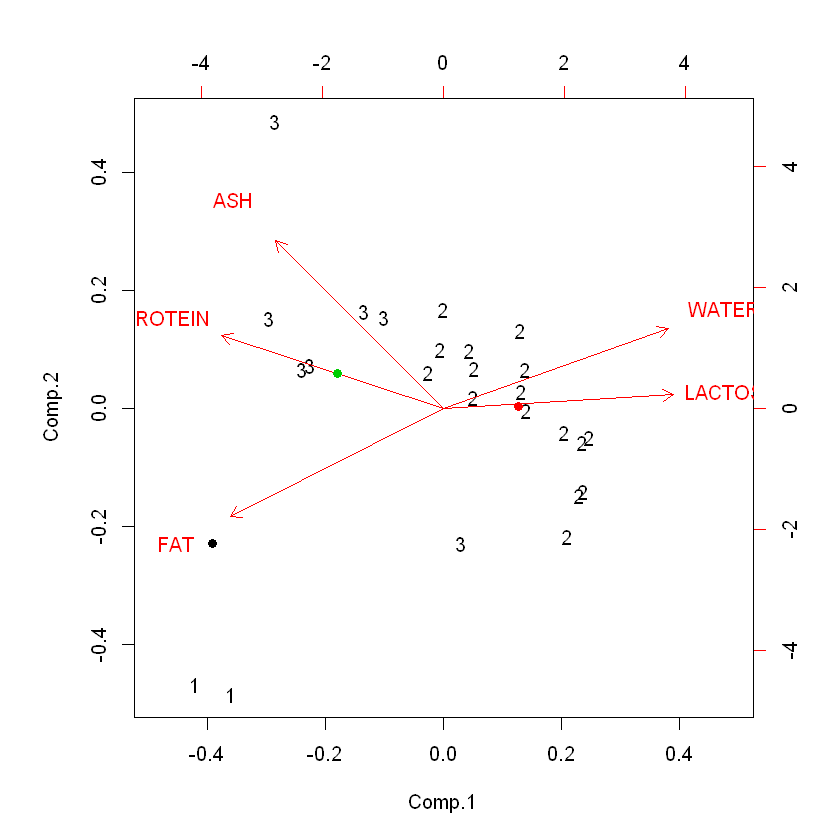

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632
2,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003


K-means clustering with 2 clusters of sizes 8, 17

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 62.66250 9.700000 22.675000 2.300000 1.2762500
2 85.48824 4.570588  4.488235 4.994118 0.6688235

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          2          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          1          1 

Within cluster sum of squares by cluster:
[1] 1664.9235  521.8994
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

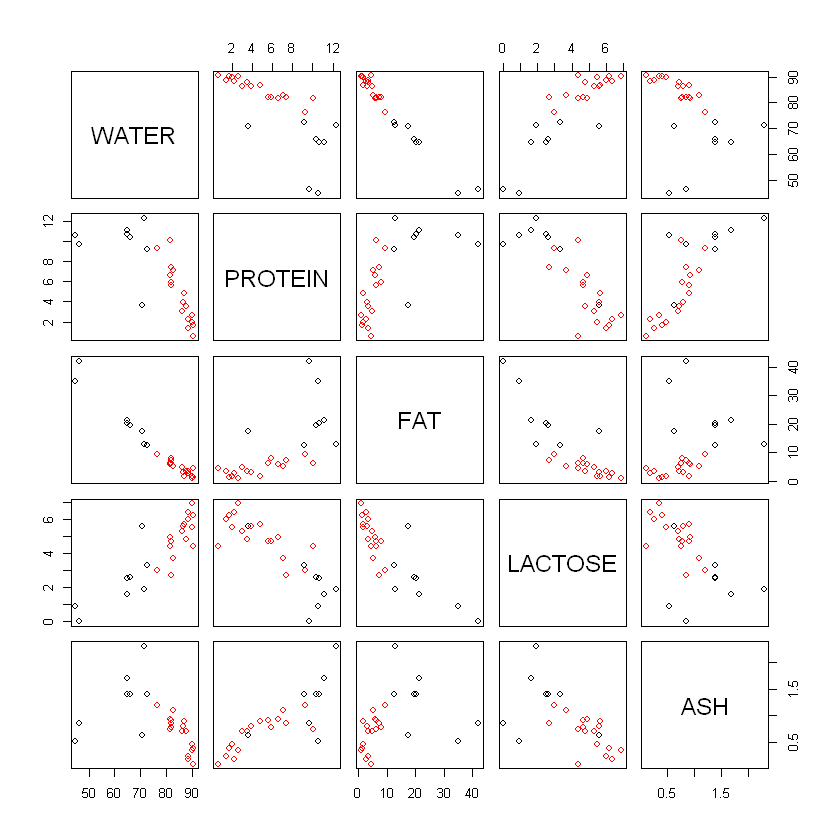

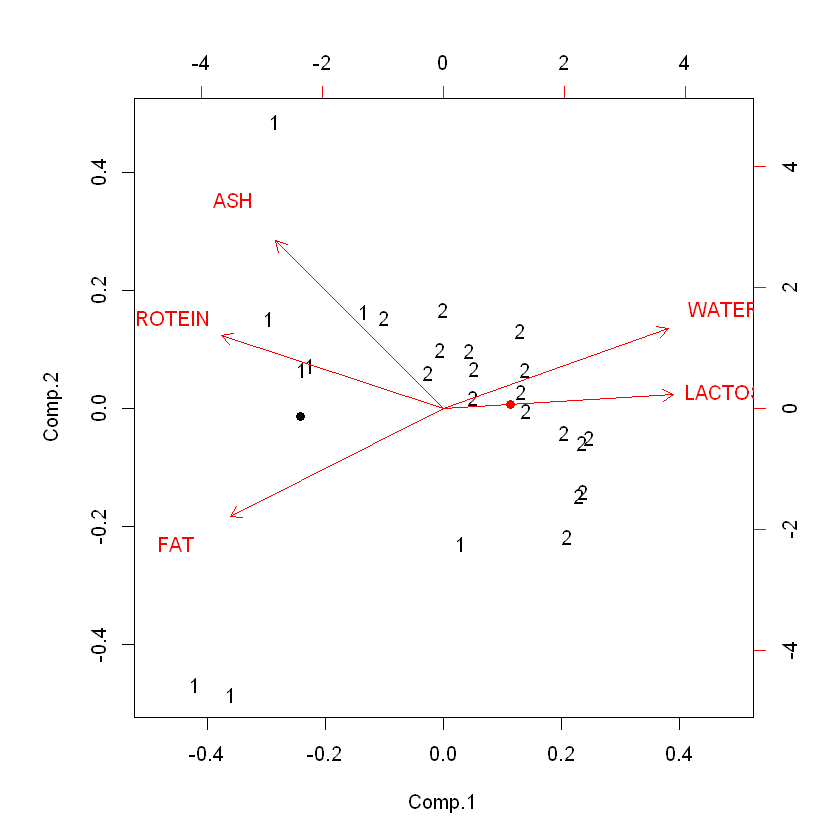

In [22]:
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
2,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
3,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
4,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286


K-means clustering with 4 clusters of sizes 2, 6, 7, 10

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 45.65000 10.150000 38.45000 0.450000 0.6900000
2 68.33333  9.550000 17.41667 2.916667 1.4716667
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 88.50000  2.570000  2.80000 5.680000 0.4850000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         4          4          4          4          4          4          4 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          4          4          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         4          3          3          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.19120 191.74708  63.53491  59.41225
 (between_SS / tot

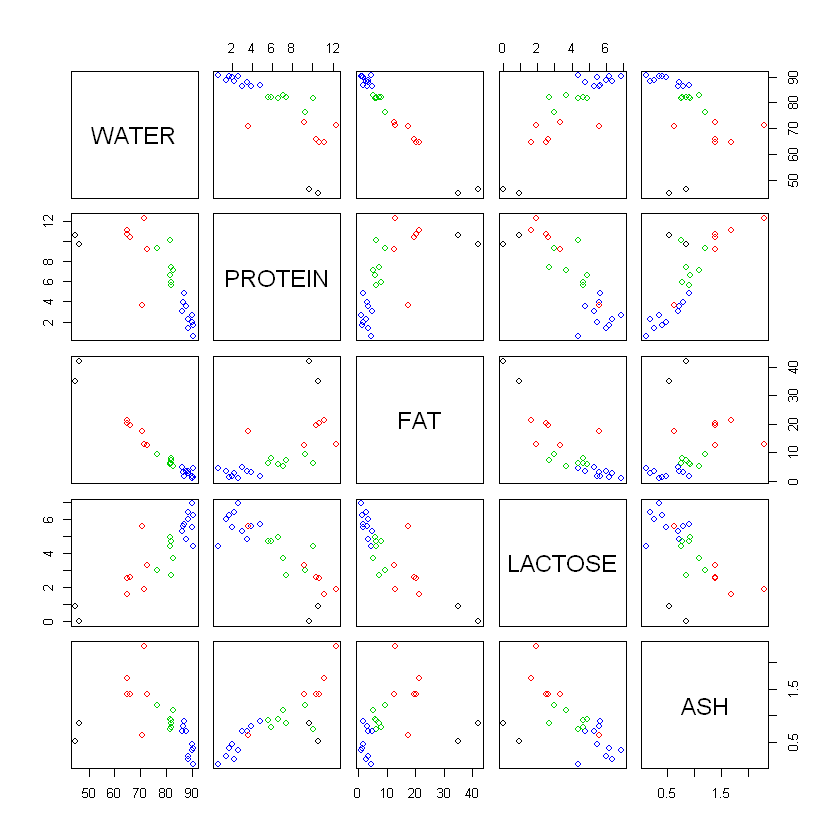

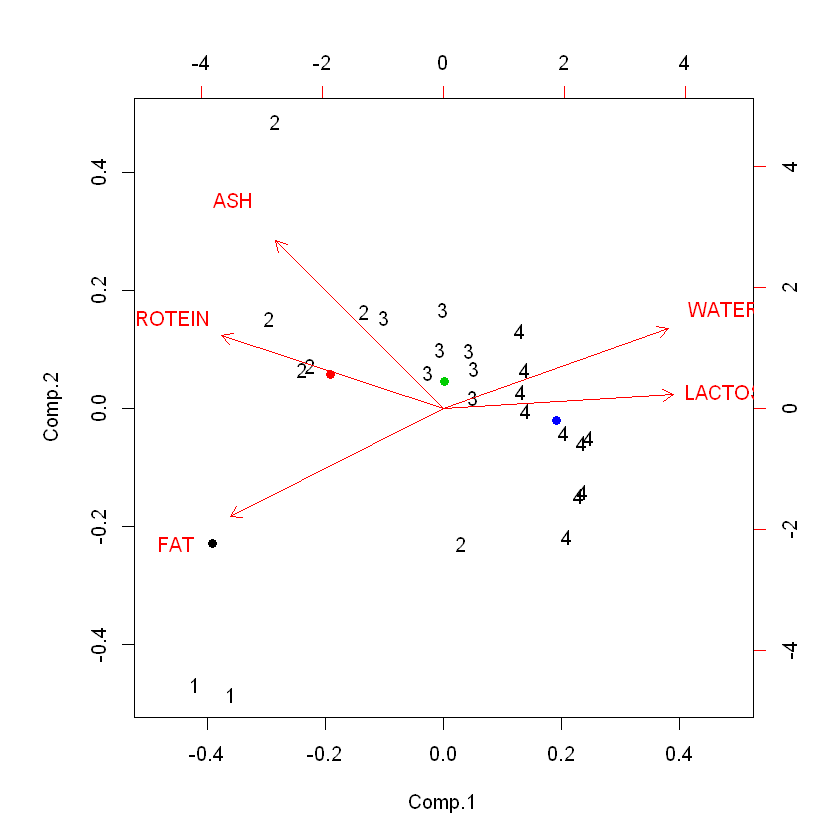

In [23]:
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

**Respuesta** 
En general, pareciera tener mejor respuesta usando 4 grupos, porque 2 son demasiado poco, lo que hace que se pierda información que podría ser útil, al menos utilizando 4 grupos, esa información queda más clara, las diferencias son más claras entre las leches

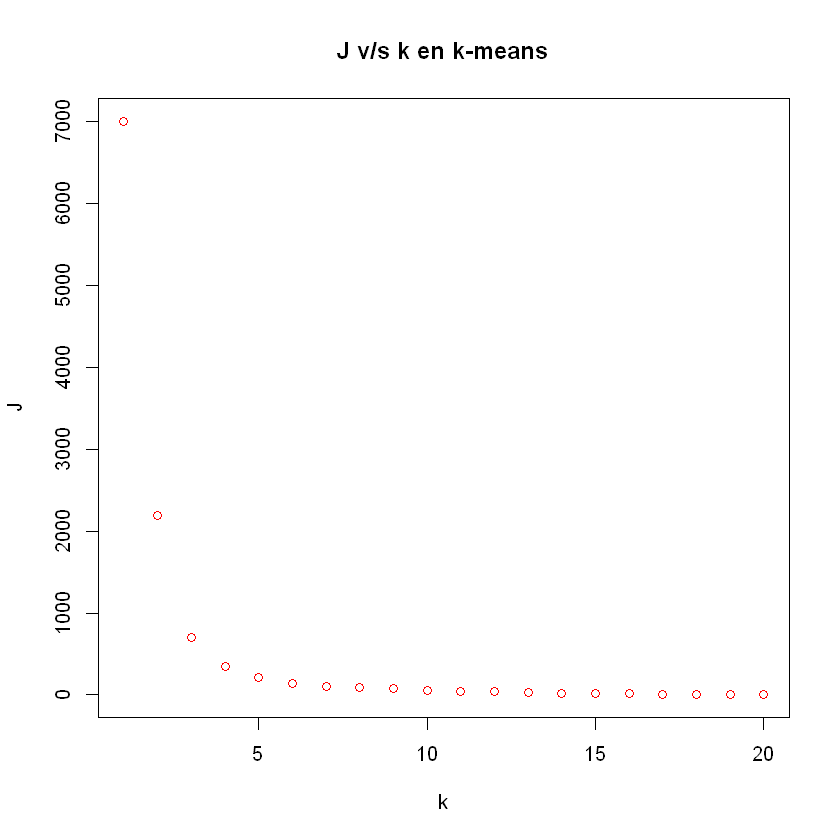

In [4]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

**Respuesta**
Al observar el gráfico pareciera que el K más apropiado sería 3, ya que luego de eso, no hay una variación tan importante.

In [5]:
best=0
for (i in 1:18){
    d1 = J[i]-J[i+1]
    d2 = J[i+1]-J[i+2]
    if (d1/d2>best){
        best=d1/d2
        ival=i+1
    }
}
best
ival

[1] 17.1737

[1] 15

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [24]:
library(cluster)
library(ggplot2)

datos <-read.csv2("DatosUsoFacebook.csv",dec=".",header=TRUE)
summary(datos)

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

In [25]:
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-2.0033326,-1.0987805,0.1888283,-0.1722242,0.4812962,-0.1991071,0.28018887,-0.26053926,0.142846378,-0.19422322,-0.01077987,-0.11973591,-0.07946073,0.009390779,-0.072958801,0.009530476
2,-0.2988795,0.9903550,0.3247794,-0.2428847,0.2399191,0.3922784,0.05592209,0.14017191,0.007182182,0.02200588,0.01917472,-0.01495599,0.07378919,0.020837870,-0.003792975,-0.009825474
3,-0.1738748,-0.4709766,-0.8443051,0.4320011,-0.9211416,-0.2586682,-0.19025233,-0.08641602,-0.206514716,0.23392096,-0.13846672,0.19249534,0.07887614,0.012414199,0.079611056,0.024523543
4,2.2494292,-0.1476656,0.1450739,0.1026912,0.1046701,-0.1844800,-0.13584800,0.08343464,0.064786586,-0.09207071,0.10908363,-0.05897094,-0.11916867,-0.050507947,-0.008800002,-0.015910935


K-means clustering with 4 clusters of sizes 36, 66, 41, 44

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.000000 1.944444 1.638889 1.861111 1.083333 2.444444 2.222222 1.833333
2 2.984848 2.787879 2.515152 2.348485 1.227273 1.742424 2.318182 2.818182
3 1.902439 2.560976 2.682927 2.390244 1.390244 1.780488 2.146341 2.634146
4 2.977273 2.909091 3.090909 2.340909 1.704545 1.727273 2.795455 3.045455
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.277778 2.333333 3.694444 1.527778 2.194444 1.277778 1.305556 1.138889
2 1.242424 1.803030 3.409091 1.409091 1.893939 1.151515 1.515152 1.181818
3 1.317073 2.000000 3.341463 1.780488 3.536585 1.365854 1.731707 1.219512
4 1.750000 1.840909 2.704545 2.386364 2.568182 1.613636 2.340909 1.795455

Clustering vector:
  [1] 1 1 1 3 3 2 2 1 3 1 3 1 2 4 3 2 1 1 4 4 3 2 4 4 2 1 2 3 2 2 3 3 4 2 3 1 2
 [38] 3 1 3 2 1 4 3 2 2 1 2 3 3 2 3 3 4 4 2 3 3 4 4 2 4 2 2 2 4 2 4 4 4 3 2 2 4
 [75]

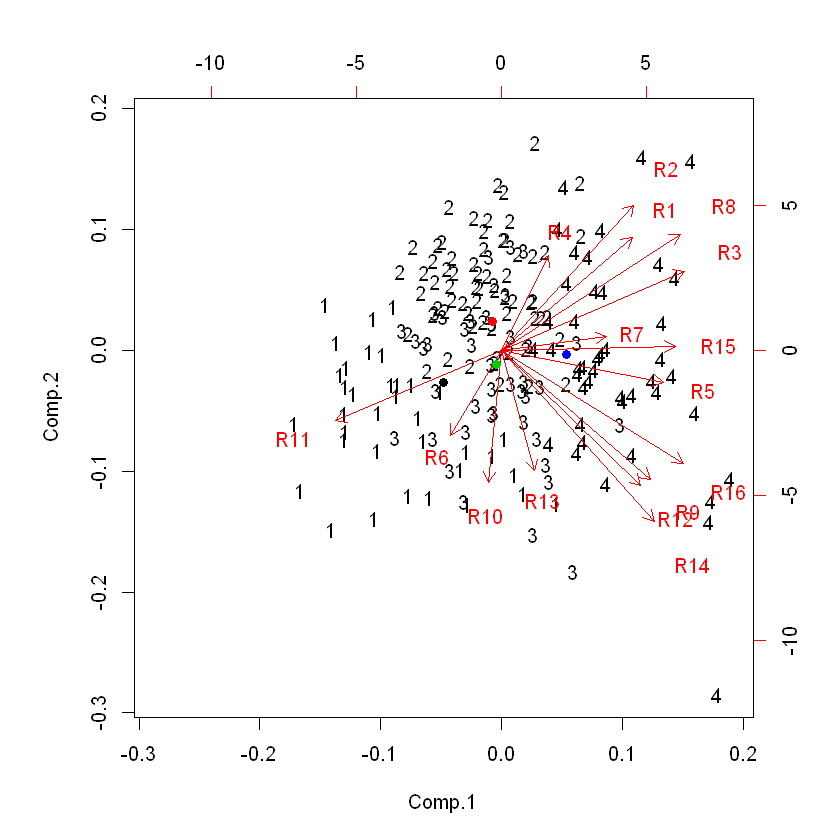

In [26]:
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)

points(res2[,1:2],col=1:k0,pch=19)

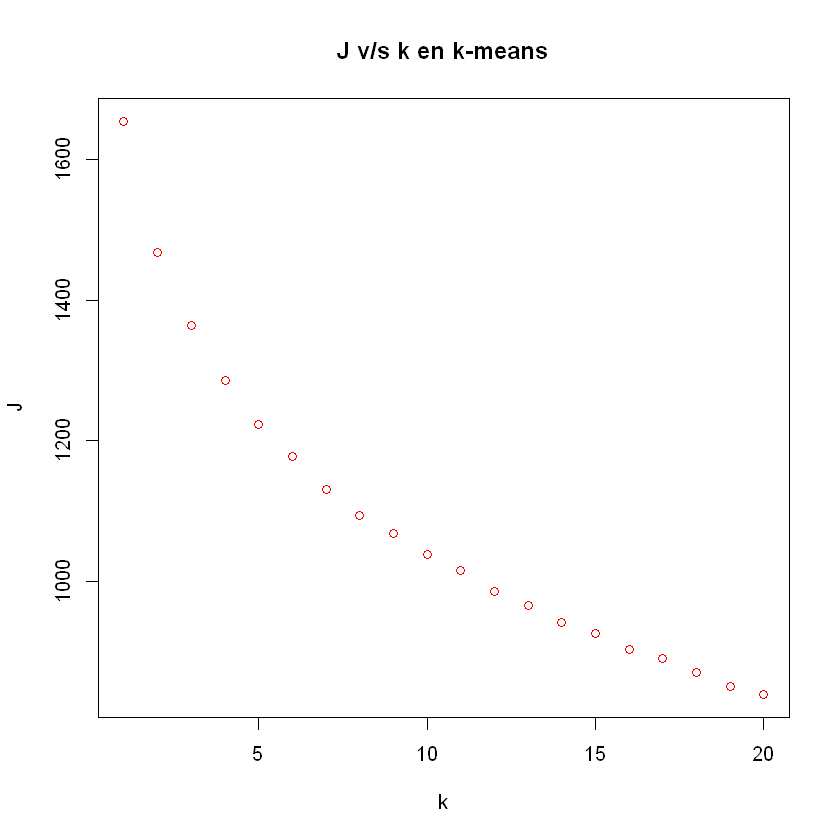

In [13]:
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Respuesta**
Del primer gráfico podemos obtener información del grupo de personas que tienden a utilizar más facebook para informarse, compartir material, buscar noticias, contactar con amigos, pero al mismo tiempo, las personas que no usan tanto facebook, esto último se puede observar en las R6 y R11 por ejemplo.

Del segundo gráfico podemos ver que los valores de K son bastante lineales, entonces a simple vista sería dificil obtener una respuesta concreta de cual sería el mejor valor.